# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
# from api_keys import api_key
api_key = "Redacted"

# Incorporated citipy to determine city based on latitude and longitude
import citipy #
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Prep query url with units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&q={city}&units={units}"

# Init lists to be filled with weather data
cityList = []
cloudiness = []
countries = []
dates = []
hums = []
lats = []
lngs = []
maxTemps = []
winds = []
cityCount = 0

# Start requests log
print(f"""
Beginning Data Retrieval
- - - - - - - - - - - - -
""")

# Loop through cities 
for city in cities:
    
    # Count cities
    cityCount = cityCount + 1
    
    # Make requests, pull data, and store in lists with error handling
    try:
        response = requests.get(f"{url}appid={api_key}&q={city}&units={units}").json()
        name = response["name"]
        print(f"Processing Record {cityCount} | {name}")
        cityList.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        hums.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        maxTemps.append(response["main"]["temp_max"])
        winds.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
        
print(f"""
- - - - - - - - - - - - -
Data Retrieval Complete
- - - - - - - - - - - - -
""")




Beginning Data Retrieval
- - - - - - - - - - - - -

Processing Record 1 | Surt
Processing Record 2 | Normandin
Processing Record 3 | East London
Processing Record 4 | Pevek
Processing Record 5 | Udachnyy
Processing Record 6 | Bilma
Processing Record 7 | Ponta do Sol
Processing Record 8 | Xichang
Processing Record 9 | Bredasdorp
City not found. Skipping...
Processing Record 11 | Thompson
Processing Record 12 | Teknaf
Processing Record 13 | Bluff
Processing Record 14 | Victoria
Processing Record 15 | Lata
Processing Record 16 | Bubaque
Processing Record 17 | Airai
Processing Record 18 | Lamont
Processing Record 19 | Ust-Ilimsk
Processing Record 20 | Flinders
Processing Record 21 | Ushuaia
City not found. Skipping...
Processing Record 23 | Busselton
Processing Record 24 | Arraial do Cabo
Processing Record 25 | Riyadh
Processing Record 26 | Lagoa
City not found. Skipping...
City not found. Skipping...
Processing Record 29 | Vila Velha
Processing Record 30 | Talnakh
Processing Record 31 | 

Processing Record 251 | Livingston
Processing Record 252 | Karasburg
Processing Record 253 | Yulara
Processing Record 254 | Nantucket
Processing Record 255 | Bloomsburg
Processing Record 256 | Celestun
Processing Record 257 | Kaeo
Processing Record 258 | Plavinas
Processing Record 259 | Alice Springs
City not found. Skipping...
Processing Record 261 | Det Udom
Processing Record 262 | Clyde River
Processing Record 263 | Kurumkan
Processing Record 264 | Panaba
Processing Record 265 | Biak
Processing Record 266 | Amatan
Processing Record 267 | Pinawa
Processing Record 268 | Atar
Processing Record 269 | Tessalit
Processing Record 270 | Norman Wells
Processing Record 271 | Straumen
Processing Record 272 | Loukhi
Processing Record 273 | Mackay
Processing Record 274 | Saint-Philippe
Processing Record 275 | Suzun
Processing Record 276 | Tortoli
Processing Record 277 | Saint-Joseph
Processing Record 278 | Barranca
Processing Record 279 | Nuuk
Processing Record 280 | Manggar
Processing Record 28

Processing Record 505 | Zabaykalsk
Processing Record 506 | Shetpe
Processing Record 507 | Puerto Ayacucho
Processing Record 508 | Dunedin
City not found. Skipping...
Processing Record 510 | Brae
Processing Record 511 | Mujiayingzi
Processing Record 512 | Uvat
Processing Record 513 | Gizo
Processing Record 514 | Ulladulla
Processing Record 515 | Pokrovsk
Processing Record 516 | Pangkalanbuun
City not found. Skipping...
Processing Record 518 | Kholm
Processing Record 519 | Yatou
Processing Record 520 | Kibre Mengist
Processing Record 521 | Kattivakkam
City not found. Skipping...
Processing Record 523 | Nanortalik
Processing Record 524 | Narsaq
Processing Record 525 | Oum Hadjer
Processing Record 526 | Puerto Armuelles
Processing Record 527 | San Jose
Processing Record 528 | Turukhansk
Processing Record 529 | Legnica
Processing Record 530 | Bouloupari
Processing Record 531 | Lewiston
Processing Record 532 | Kayes
City not found. Skipping...
Processing Record 534 | Sulangan
Processing Reco

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Zip rows
rows = zip(cityList,cloudiness,countries,dates,hums,lats,lngs,maxTemps,winds)
headers = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']

# Write to CSV
with open(output_data_file, "w") as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    for row in rows:
        writer.writerow(row)
        

In [5]:
# Create Dataframe
df = pd.read_csv(output_data_file)
df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Surt,53,LY,1578096433,71,31.21,16.59,51.1,15.03
1,Normandin,75,CA,1578096433,89,48.84,-72.53,35.6,9.17
2,East London,100,ZA,1578096433,95,-33.02,27.91,74.3,14.18
3,Pevek,33,RU,1578096433,60,69.70,170.27,-0.9,5.95
4,Udachnyy,7,RU,1578096433,82,66.42,112.40,-18.4,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

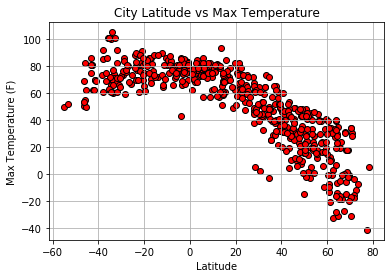

In [6]:
# Plot data with labels and save fig
plt.scatter(df['Lat'],df['Max Temp'],color='r',edgecolors='black')
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Images/Temp.png')

#### Latitude vs. Humidity Plot

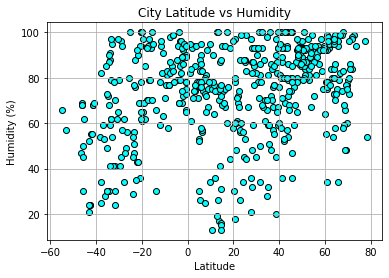

In [7]:
# Plot data with labels and save fig
plt.scatter(df['Lat'],df['Humidity'],color='aqua',edgecolors='black')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Images/Humidity.png')

#### Latitude vs. Cloudiness Plot

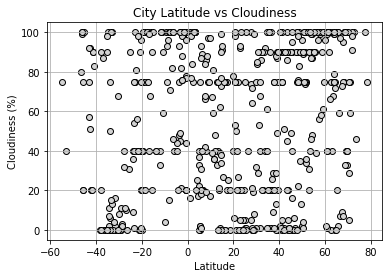

In [8]:
# Plot data with labels and save fig
plt.scatter(df['Lat'],df['Cloudiness'],color='lightgrey',edgecolors='black')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Images/Cloudiness.png')

#### Latitude vs. Wind Speed Plot

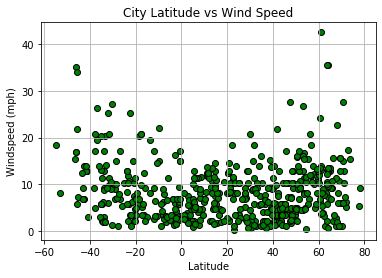

In [9]:
# Plot data with labels and save fig
plt.scatter(df['Lat'],df['Wind Speed'],color='green',edgecolors='black')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid()
plt.savefig('Images/Wind.png')